# Set up environment

In [17]:
!python -c "import monai" || pip install -q "monai-weekly[pillow, tqdm]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

^C


In [3]:
pip install -r D:\shuzhi\monai_replicode\tutorials-main\tutorials-main\requirements.txt

  Using cached flake8-7.2.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached mccabe-0.7.0-py2.py3-none-any.whl.metadata (5.0 kB)
  Using cached pycodestyle-2.13.0-py2.py3-none-any.whl.metadata (4.5 kB)
  Using cached pyflakes-3.3.2-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-win_amd64.whl.metadata (2.1 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached nbclient-0.10.2-py3-none-any.whl.metadata (8.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached grpcio-1.71.0-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata 

In [12]:
pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install -r https://raw.githubusercontent.com/Project-MONAI/MONAI/dev/requirements-dev.txt

Ignoring torch: markers 'sys_platform != "win32"' don't match your environmentNote: you may need to restart the kernel to use updated packages.

Ignoring setuptools: markers 'python_version >= "3.12"' don't match your environment
Ignoring pytype: markers 'platform_system != "Windows"' don't match your environment
Ignoring cucim-cu12: markers 'platform_system == "Linux" and python_version >= "3.9" and python_version <= "3.10"' don't match your environment
Ignoring imagecodecs: markers 'platform_system == "Linux" or platform_system == "Darwin"' don't match your environment
Ignoring tifffile: markers 'platform_system == "Linux" or platform_system == "Darwin"' don't match your environment
Ignoring nni: markers 'platform_system == "Linux" and "arm" not in platform_machine and "aarch" not in platform_machine' don't match your environment
  Cloning https://github.com/Project-MONAI/MetricsReloaded (to revision monai-support) to c:\users\asus\appdata\local\temp\pip-install-q8cyz9xs\metricsreloa

  Running command git clone --filter=blob:none --quiet https://github.com/Project-MONAI/MetricsReloaded 'C:\Users\ASUS\AppData\Local\Temp\pip-install-q8cyz9xs\metricsreloaded_4948a86420d44e4ba6cc3387f26515dd'
  Running command git checkout -b monai-support --track origin/monai-support
  branch 'monai-support' set up to track 'origin/monai-support'.
  Switched to a new branch 'monai-support'
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\ASUS\AppData\Local\Temp\pip-req-build-aoxbs_e9'
  Running command git rev-parse -q --verify 'sha^6fdee8f2727f4506cfbbe553e23b895e27956588'
  Running command git fetch -q https://github.com/facebookresearch/segment-anything.git 6fdee8f2727f4506cfbbe553e23b895e27956588
  Running command git checkout -q 6fdee8f2727f4506cfbbe553e23b895e27956588
  You can safely remove it manually.


# Set up imports

In [1]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
import PIL
import torch
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from sklearn.metrics import classification_report

from monai.apps import download_and_extract
from monai.config import print_config
from monai.data import decollate_batch, DataLoader
from monai.metrics import ROCAUCMetric
from monai.networks.nets import DenseNet121
from monai.transforms import (
    Activations,
    EnsureChannelFirst,
    AsDiscrete,
    Compose,
    LoadImage,
    RandFlip,
    RandRotate,
    RandZoom,
    ScaleIntensity,
)
from monai.utils import set_determinism

print_config()

MONAI version: 1.5.dev2516
Numpy version: 2.2.5
Pytorch version: 2.6.0+cpu
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 875aa3d53281b83a205442db83ac41ddf817ef9a
MONAI __file__: d:\shuzhi\.venv\lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.4.3
Nibabel version: 5.3.2
scikit-image version: 0.25.2
scipy version: 1.15.2
Pillow version: 11.2.1
Tensorboard version: 2.19.0
gdown version: 5.2.0
TorchVision version: 0.21.0+cpu
tqdm version: 4.67.1
lmdb version: 1.6.2
psutil version: 7.0.0
pandas version: 2.2.3
einops version: 0.8.1
transformers version: 4.40.2
mlflow version: 2.21.3
pynrrd version: 1.1.3
clearml version: 2.0.0rc0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



# Set up data directory

In [ ]:
# directory = os.environ.get("MONAI_DATA_DIRECTORY")
# if directory is not None:
#     os.makedirs(directory, exist_ok=True)
# root_dir = tempfile.mkdtemp() if directory is None else directory
# print(root_dir)

C:\Users\ASUS\AppData\Local\Temp\tmpj2ti7963


In [2]:
# 直接指定路径（无需环境变量）
# Set specific path
directory = r"D:\shuzhi\monai_replicode\monai_datasets"  # 使用原始字符串避免转义
os.makedirs(directory, exist_ok=True)
root_dir = directory
print("数据目录路径:", root_dir)

数据目录路径: D:\shuzhi\monai_replicode\monai_datasets


# Download dataset

In [47]:
# resource = "https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/MedNIST.tar.gz"
# md5 = "0bc7306e7427e00ad1c5526a6677552d"

# compressed_file = os.path.join(root_dir, "MedNIST.tar.gz")
# data_dir = os.path.join(root_dir, "MedNIST")
# if not os.path.exists(data_dir):
#     download_and_extract(resource, compressed_file, root_dir, md5)

If you run the above code fail, please try to downlaod the dataset with 'https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/MedNIST.tar.gz' with Edge/Chrome, then put it in specific path (for example: D:\monai_replicode\monai_datasets).

When extracting the MedNIST.tar.gz file, please run the command tar -xzvf MedNIST.tar.gz in the Terminal. This extraction method helps avoid multi-layered nested directories (such as finding another MedNIST folder inside the extracted MedNIST folder).

In [3]:
compressed_file = os.path.join(root_dir, "MedNIST.tar.gz")
data_dir = os.path.join(root_dir, "MedNIST")

# # 删除自动下载代码，仅检查数据目录是否存在
# if not os.path.exists(data_dir):
#     # 若手动解压后仍提示目录不存在，需检查解压路径是否正确
#     raise FileNotFoundError(f"请手动解压 {compressed_file} 到 {data_dir}")

In [4]:
print("压缩包路径：", compressed_file)  # 应为 D:\...\MedNIST.tar.gz
print("数据目录路径：", data_dir)       # 应为 D:\...\MedNIST

压缩包路径： D:\shuzhi\monai_replicode\monai_datasets\MedNIST.tar.gz
数据目录路径： D:\shuzhi\monai_replicode\monai_datasets\MedNIST


In [5]:
# 打印绝对路径（关键！）
print("root_dir path:", os.path.abspath(root_dir))
print("data_dir path:", os.path.abspath(data_dir))

root_dir path: D:\shuzhi\monai_replicode\monai_datasets
data_dir path: D:\shuzhi\monai_replicode\monai_datasets\MedNIST


# Set deterministic training for reproducibility

In [6]:
set_determinism(seed=0)

# Read image filenames from the dataset folders

In [7]:
# os.listdir(data_dir): 列出目标目录下所有文件和子目录名称（仅名称，不带路径）
# os.path.isdir(...): 检查给定的路径是否是一个目录（排除普通文件）
# sorted(...): 对生成的类别目录名进行字母排序（确保后续索引一致性）
class_names = sorted(x for x in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, x)))

# 获取类别总数（每个子目录代表一个分类）
num_class = len(class_names)

# 双重列表推导式结构：
# 外层循环：遍历每个类别索引i
# 内层循环：遍历类别i对应的目录下所有文件名x，拼接完整路径
# os.path.join(...): 自动适配操作系统的路径拼接（避免手动拼接/和\）
image_files = [
    [os.path.join(data_dir, class_names[i], x) for x in os.listdir(os.path.join(data_dir, class_names[i]))]
    for i in range(num_class)
]

# len(image_files[i]): 获取第i个类别下的图像数量
num_each = [len(image_files[i]) for i in range(num_class)]

# 创建两个平行列表：
# image_files_list: 所有图像文件的完整路径列表（扁平化展开）
# image_class: 每个图像对应的类别索引（如0代表class_names[0]）
image_files_list = []
image_class = []
for i in range(num_class):
    # list.extend(): 将另一个列表的所有元素追加到当前列表末尾（比+=更高效）
    image_files_list.extend(image_files[i])
    # [i] * num_each[i]: 生成与图像数量等长的类别索引列表（如[0,0,0,...]）
    image_class.extend([i] * num_each[i])

# 统计图像总数
num_total = len(image_class)

# PIL.Image.open(): 使用Pillow库打开图像文件（不实际加载像素数据，仅读取元信息）
# .size: 返回图像的（宽度, 高度）元组（假设数据集中所有图像尺寸一致）
image_width, image_height = PIL.Image.open(image_files_list[0]).size

print(f"Total image count: {num_total}")
print(f"Image dimensions: {image_width} x {image_height}")
print(f"Label names: {class_names}")
print(f"Label counts: {num_each}")

Total image count: 58954
Image dimensions: 64 x 64
Label names: ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label counts: [10000, 8954, 10000, 10000, 10000, 10000]


# Randomly pick images from the dataset to visualize and check

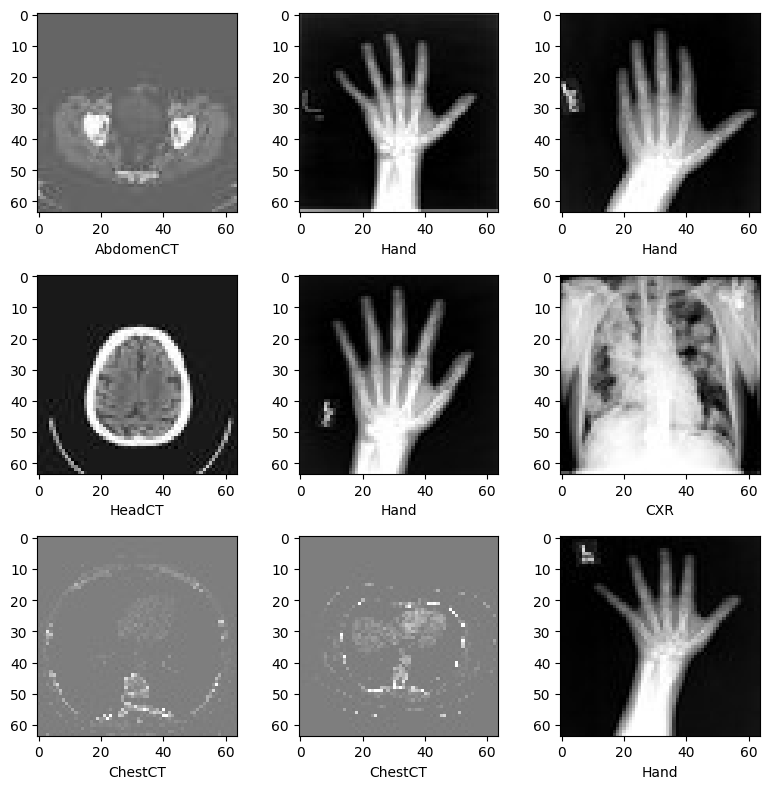

In [8]:
plt.subplots(3, 3, figsize=(8, 8))
for i, k in enumerate(np.random.randint(num_total, size=9)):
    im = PIL.Image.open(image_files_list[k])
    arr = np.array(im)
    plt.subplot(3, 3, i + 1)
    plt.xlabel(class_names[image_class[k]])
    plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
plt.tight_layout()
plt.show()

# Prepare training, validation and test data lists

Randomly select 10% of the dataset as validation and 10% as test.

In [9]:
val_frac = 0.1 # 10% as validation
test_frac = 0.1 # 10% as test
length = len(image_files_list) # 图像文件总数，获取数据总量
indices = np.arange(length) # 生成连续索引数组 [0, 1, 2, ..., length-1]
np.random.shuffle(indices) # 原地打乱索引顺序（确保随机性）

test_split = int(test_frac * length) # 测试集截止位置（前 10%）
val_split = int(val_frac * length) + test_split # 验证集截止位置（再取 10%，累计 20%）
test_indices = indices[:test_split] # 测试集索引（前 10%）
val_indices = indices[test_split:val_split] # 验证集索引（10%~20%）
train_indices = indices[val_split:] # 训练集索引（剩余 80%）

train_x = [image_files_list[i] for i in train_indices]
train_y = [image_class[i] for i in train_indices]
val_x = [image_files_list[i] for i in val_indices]
val_y = [image_class[i] for i in val_indices]
test_x = [image_files_list[i] for i in test_indices]
test_y = [image_class[i] for i in test_indices]

print(f"Training count: {len(train_x)}, Validation count: " f"{len(val_x)}, Test count: {len(test_x)}")

Training count: 47164, Validation count: 5895, Test count: 5895


# Define MONAI transforms, Dataset and Dataloader to pre-process data

In [10]:
train_transforms = Compose(
    [
        # LoadImage: 加载医学图像文件（如NIfTI、DICOM）
        # image_only=True: 只返回图像数据（不包含元数据头文件），在医学影像领域，​​元数据头文件（Header Files）​​ 是存储图像非像素信息的文件
        LoadImage(image_only=True),

        # EnsureChannelFirst: 确保张量有通道维度（医学图像常为单通道，添加通道维度到最前）
        # 例如将形状 (H,W,D) -> (C,H,W,D)（C=1）
        EnsureChannelFirst(),

        # ScaleIntensity: 归一化像素值到[0,1]或[-1,1]（默认根据数据类型自动处理）        
        ScaleIntensity(),

            # 旋转增强（Rotation Augmentation）是一种 ​​数据增强（Data Augmentation）​​ 技术，
            # 通过 ​​对图像进行随机角度旋转​​ 生成新的训练样本。具体来说：
            # ​操作方式​​：将图像绕指定轴（如 2D 图像绕中心点、3D 医学图像绕某空间轴）旋转一定角度。
            #
            # 为什么在训练时需要旋转增强？
            # 1. 模拟真实世界变化​​: 医学图像可能因患者体位、设备摆放角度不同而呈现不同方向（如 MRI 扫描时的倾斜）
            # 2. 医学数据稀缺性​​：医学标注数据获取成本高，旋转增强通过几何变换 ​​“凭空”生成新数据​​，提升数据利用率
            # 3. 防止过拟合​: 若训练数据中所有图像均为固定角度（如正面），模型可能误将角度信息作为分类依据。旋转增强打破这种伪关联。


        # RandRotate: 随机旋转增强（仅在训练时启用）
        # range_x=np.pi/12: 旋转角度范围 [-15°, 15°]
        # prob=0.5: 每个样本有50%概率应用该变换
        # keep_size=True: 旋转后保持原始图像尺寸（自动裁剪或填充）        
        RandRotate(range_x=np.pi / 12, prob=0.5, keep_size=True),
        RandFlip(spatial_axis=0, prob=0.5),
        RandZoom(min_zoom=0.9, max_zoom=1.1, prob=0.5),
    ]
)

val_transforms = Compose([LoadImage(image_only=True), EnsureChannelFirst(), ScaleIntensity()])

y_pred_trans = Compose([Activations(softmax=True)])
y_trans = Compose([AsDiscrete(to_onehot=num_class)])

In [11]:
# 自定义数据集类（继承PyTorch的Dataset基类）
class MedNISTDataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels, transforms):
        """
        参数说明：
        image_files: 图像路径列表（如['/data/img1.nii', '/data/img2.nii']）
        labels: 对应的类别标签列表（如[0, 1, 2,...]）
        transforms: 数据预处理/增强管道（如Compose组合的变换）
        """
        self.image_files = image_files  # 存储图像路径
        self.labels = labels            # 存储标签数据
        self.transforms = transforms    # 存储预处理管道

    def __len__(self):
        """返回数据集的总样本数（DataLoader依赖此方法确定迭代次数）"""
        return len(self.image_files)    # 直接返回图像路径列表的长度

    def __getitem__(self, index):
        """核心方法：根据索引返回单个样本（图像+标签），供DataLoader批量获取"""
        # 执行预处理管道：self.transforms()会处理图像路径（如加载文件、增强等）
        # 返回格式通常为（Tensor图像, 标量标签）
        return self.transforms(self.image_files[index]), self.labels[index]

# ================== 训练集数据加载器 ==================
# 实例化训练数据集（应用包含数据增强的预处理管道）
train_ds = MedNISTDataset(train_x,       # 训练集图像路径列表
                         train_y,        # 训练集标签列表
                         train_transforms) # 包含数据增强的训练预处理

# 创建训练数据加载器（实现批量加载、多线程加速）
train_loader = DataLoader(
    train_ds,
    batch_size=300,   # 每个批次加载300个样本（根据GPU显存调整）
    shuffle=True,     # 每个epoch打乱数据顺序（防止模型记忆样本顺序）
    num_workers=10    # 使用10个子进程并行加载数据（加速IO密集型操作）
)

# ================== 验证集数据加载器 ==================
val_ds = MedNISTDataset(val_x, val_y, val_transforms)  # 验证集使用基础预处理
val_loader = DataLoader(
    val_ds,
    batch_size=300,
    shuffle=False,    # 验证集无需打乱顺序
    num_workers=10
)

# ================== 测试集数据加载器 ==================
test_ds = MedNISTDataset(test_x, test_y, val_transforms)  # 测试集复用验证集的预处理
test_loader = DataLoader(
    test_ds,
    batch_size=300,
    shuffle=False,    # 测试集必须保持原始顺序（用于结果可追溯）
    num_workers=10
)

This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


# Define network and optimizer

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenseNet121(spatial_dims=2, in_channels=1, out_channels=num_class).to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-5)

# Epochs=4 的直观含义​​：当设置 epochs=4 时，表示模型将 ​​完整遍历训练集数据 4 次​​。
# 每次完整遍历称为一个 Epoch，具体表现如下：
# ​第1个 Epoch​​：模型首次看到所有训练样本，学习基础特征。
# ​第2~4个 Epoch​​：模型复习数据，逐步调整参数以优化预测。
#
# 每个 Epoch 的具体流程：
# 数据准备：1、打乱数据流程；2、应用随机增强（如旋转、翻转）
# 训练迭代：1、加载一个批次（300 张图）→ 前向传播 → 计算损失 → 反向传播 → 更新参数
# 验证与监控：每个 Epoch 结束后，在验证集上评估模型性能（如准确率），监控是否过拟合
max_epochs = 4


val_interval = 1
auc_metric = ROCAUCMetric()

# Model training

In [1]:
# best_metric = -1
# best_metric_epoch = -1
# epoch_loss_values = []
# metric_values = []
# writer = SummaryWriter()

# for epoch in range(max_epochs):
#     print("-" * 10)
#     print(f"epoch {epoch + 1}/{max_epochs}")
#     model.train()
#     epoch_loss = 0
#     step = 0
#     for batch_data in train_loader:
#         step += 1
#         inputs, labels = batch_data[0].to(device), batch_data[1].to(device)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = loss_function(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         epoch_loss += loss.item()
#         print(f"{step}/{len(train_ds) // train_loader.batch_size}, " f"train_loss: {loss.item():.4f}")
#         epoch_len = len(train_ds) // train_loader.batch_size
#         writer.add_scalar("train_loss", loss.item(), epoch_len * epoch + step)
#     epoch_loss /= step
#     epoch_loss_values.append(epoch_loss)
#     print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

#     if (epoch + 1) % val_interval == 0:
#         model.eval()
#         with torch.no_grad():
#             y_pred = torch.tensor([], dtype=torch.float32, device=device)
#             y = torch.tensor([], dtype=torch.long, device=device)
#             for val_data in val_loader:
#                 val_images, val_labels = (
#                     val_data[0].to(device),
#                     val_data[1].to(device),
#                 )
#                 y_pred = torch.cat([y_pred, model(val_images)], dim=0)
#                 y = torch.cat([y, val_labels], dim=0)
#             y_onehot = [y_trans(i) for i in decollate_batch(y, detach=False)]
#             y_pred_act = [y_pred_trans(i) for i in decollate_batch(y_pred)]
#             auc_metric(y_pred_act, y_onehot)
#             result = auc_metric.aggregate()
#             auc_metric.reset()
#             del y_pred_act, y_onehot
#             metric_values.append(result)
#             acc_value = torch.eq(y_pred.argmax(dim=1), y)
#             acc_metric = acc_value.sum().item() / len(acc_value)
#             if result > best_metric:
#                 best_metric = result
#                 best_metric_epoch = epoch + 1
#                 torch.save(model.state_dict(), os.path.join(root_dir, "best_metric_model.pth"))
#                 print("saved new best metric model")
#             print(
#                 f"current epoch: {epoch + 1} current AUC: {result:.4f}"
#                 f" current accuracy: {acc_metric:.4f}"
#                 f" best AUC: {best_metric:.4f}"
#                 f" at epoch: {best_metric_epoch}"
#             )
#             writer.add_scalar("val_accuracy", acc_metric, epoch + 1)

# print(f"train completed, best_metric: {best_metric:.4f} " f"at epoch: {best_metric_epoch}")
# writer.close()

# Plot the loss and metric

In [ ]:
plt.figure("train", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.title("Val AUC")
x = [val_interval * (i + 1) for i in range(len(metric_values))]
y = metric_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.show()